In [100]:
import geopandas as gpd
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.tree import export_graphviz
# from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import pydot
from sklearn import preprocessing

In [96]:
data = gpd.read_file('data/woz2017.gpkg')

In [ ]:
# data.columns

In [97]:
data = data[[ 'aantal_inwoners', 'aantal_mannen', 'aantal_vrouwen',
       'aantal_inwoners_0_tot_15_jaar', 'aantal_inwoners_15_tot_25_jaar',
       'aantal_inwoners_25_tot_45_jaar', 'aantal_inwoners_45_tot_65_jaar',
       'aantal_inwoners_65_jaar_en_ouder', 'aantal_part_huishoudens',
       'gemiddelde_huishoudensgrootte', 'aantal_eenpersoonshuishoudens',
       'aantal_meerpersoonshuishoudens_zonder_kind',
       'aantal_eenouderhuishoudens', 'aantal_tweeouderhuishoudens',
       'aantal_geboorten', 'percentage_nederlandse_achtergrond',
       'percentage_westerse_migr_achtergr',
       'percentage_niet_westerse_migr_achtergr', 'aantal_woningen',
       'aantal_woningen_bouwjaar_voor_1945',
       'aantal_woningen_bouwjaar_45_tot_65',
       'aantal_woningen_bouwjaar_65_tot_75',
       'aantal_woningen_bouwjaar_75_tot_85',
       'aantal_woningen_bouwjaar_85_tot_95',
       'aantal_woningen_bouwjaar_95_tot_05',
       'aantal_woningen_bouwjaar_05_tot_15',
       'aantal_woningen_bouwjaar_15_en_later', 'gemiddelde_woz_waarde_woning',
       'percentage_koopwoningen', 'percentage_huurwoningen',
       'aantal_huurwoningen_in_bezit_woningcorporaties',
       'aantal_meergezins_woningen', 'aantal_niet_bewoonde_woningen',
       'gemiddeld_gasverbruik_woning',
       'gemiddeld_elektricteitsverbruik_woning',
       'aantal_personen_met_uitkering_onder_AOWlft',
       'oprit_hoofdverkeersweg_gemiddelde_afstand_in_km',
       'kinderdagverblijf_gemiddelde_afstand_in_km',
       'kinderdagverblijf_aantal_binnen_1_km',
       'kinderdagverblijf_aantal_binnen_3_km',
       'kinderdagverblijf_aantal_binnen_5_km',
       'buitenschoolse_opvang_gem_afstand_in_km',
       'buitenschoolse_opvang_aantal_binnen_1_km',
       'buitenschoolse_opvang_aantal_binnen_3_km',
       'buitenschoolse_opvang_aantal_binnen_5_km',
       'grote_supermarkt_gemiddelde_afstand_in_km',
       'grote_supermarkt_aantal_binnen_1_km',
       'grote_supermarkt_aantal_binnen_3_km',
       'grote_supermarkt_aantal_binnen_5_km',
       'winkels_ov_dagelijkse_levensm_gem_afst_in_km',
       'winkels_ov_dagel_levensm_aantal_binnen_1_km',
       'winkels_ov_dagel_levensm_aantal_binnen_3_km',
       'winkels_ov_dagel_levensm_aantal_binnen_5_km',
       'warenhuis_gemiddelde_afstand_in_km', 'warenhuis_aantal_binnen_5_km',
       'warenhuis_aantal_binnen_10_km', 'warenhuis_aantal_binnen_20_km',
       'cafe_gemiddelde_afstand_in_km', 'cafe_aantal_binnen_1_km',
       'cafe_aantal_binnen_3_km', 'cafe_aantal_binnen_5_km',
       'cafetaria_gemiddelde_afstand_in_km', 'cafetaria_aantal_binnen_1_km',
       'cafetaria_aantal_binnen_3_km', 'cafetaria_aantal_binnen_5_km',
       'restaurant_gemiddelde_afstand_in_km', 'restaurant_aantal_binnen_1_km',
       'restaurant_aantal_binnen_3_km', 'restaurant_aantal_binnen_5_km',
       'hotel_gemiddelde_afstand_in_km', 'hotel_aantal_binnen_5_km',
       'hotel_aantal_binnen_10_km', 'hotel_aantal_binnen_20_km',
       'treinstation_gemiddelde_afstand_in_km',
       'overstapstation_gemiddelde_afstand_in_km',
       'brandweerkazerne_gemiddelde_afstand_in_km',
       'omgevingsadressendichtheid', 'stedelijkheid', 'ms_fid']]

In [98]:
data = pd.DataFrame(data)

In [102]:
#hier normalizeer ik die shit
np.set_printoptions(threshold=np.inf)
 
min_max_scaler = preprocessing.MinMaxScaler()
 
data_minmax = min_max_scaler.fit_transform(data[["gemiddelde_woz_waarde_woning"]])
data["woz_normalisatie"] = data_minmax

In [152]:
#klasificeren
p25 = data['woz_normalisatie'].quantile(q=0.25)
p50 = data['woz_normalisatie'].quantile(q=0.50)
p75 = data['woz_normalisatie'].quantile(q=0.75)
p100 = data['woz_normalisatie'].quantile(q=1)
m1 = data["woz_normalisatie"] < p25
m2 = np.logical_and(data["woz_normalisatie"] > p25,data["woz_normalisatie"] < p50)
m3 = np.logical_and(data["woz_normalisatie"] > p50,data["woz_normalisatie"] < p75)
m4 = data["woz_normalisatie"] > p75
data['klasse_woz'] = np.select([m1,m2,m3,m4], ['Laag','Middel','Hoog','Heel-Hoog'], default='Laag')

In [132]:
# y = data['klasse_woz']
# for i in range(len(y)):
#   y[i] = 0 if y[i] == 'Laag' else y[i]
# for i in range(len(y)):
#   y[i] = 1 if y[i] == 'Middel' else y[i]
# for i in range(len(y)):
#   y[i] = 2 if y[i] == 'Hoog' else y[i]
# for i in range(len(y)):
#   y[i] = 3 if y[i] == 'Heel-Hoog' else y[i]
# for i in range(len(y)):
#   int(i)
# y = pd.DataFrame(y)

In [153]:
y = data['klasse_woz']

y.replace(to_replace='Laag', value= '0', inplace=True)
y.replace(to_replace='Middel', value= '1', inplace=True)
y.replace(to_replace='Hoog', value= '2', inplace=True)
y.replace(to_replace='Heel-Hoog', value= '3', inplace=True)


In [154]:
y.describe()


count     4066
unique       4
top          0
freq      1083
Name: klasse_woz, dtype: object

In [155]:
y.unique()

array(['3', '1', '2', '0'], dtype=object)

In [156]:


#hier maak ik twee klassen een cijfer 4 en 5 voor goede app en 1,2 en 3 voor een slechte app
dtree = data.drop(columns=['gemiddelde_woz_waarde_woning','klasse_woz','woz_normalisatie'])

feature_cols = ['aantal_inwoners', 'aantal_mannen', 'aantal_vrouwen',
       'aantal_inwoners_0_tot_15_jaar', 'aantal_inwoners_15_tot_25_jaar',
       'aantal_inwoners_25_tot_45_jaar', 'aantal_inwoners_45_tot_65_jaar',
       'aantal_inwoners_65_jaar_en_ouder', 'aantal_part_huishoudens',
       'gemiddelde_huishoudensgrootte', 'aantal_eenpersoonshuishoudens',
       'aantal_meerpersoonshuishoudens_zonder_kind',
       'aantal_eenouderhuishoudens', 'aantal_tweeouderhuishoudens',
       'aantal_geboorten', 'percentage_nederlandse_achtergrond',
       'percentage_westerse_migr_achtergr',
       'percentage_niet_westerse_migr_achtergr', 'aantal_woningen',
       'aantal_woningen_bouwjaar_voor_1945',
       'aantal_woningen_bouwjaar_45_tot_65',
       'aantal_woningen_bouwjaar_65_tot_75',
       'aantal_woningen_bouwjaar_75_tot_85',
       'aantal_woningen_bouwjaar_85_tot_95',
       'aantal_woningen_bouwjaar_95_tot_05',
       'aantal_woningen_bouwjaar_05_tot_15',
       'aantal_woningen_bouwjaar_15_en_later',
       'percentage_koopwoningen',
       'percentage_huurwoningen',
       'aantal_huurwoningen_in_bezit_woningcorporaties',
       'aantal_meergezins_woningen', 'aantal_niet_bewoonde_woningen',
       'gemiddeld_gasverbruik_woning',
       'gemiddeld_elektricteitsverbruik_woning',
       'aantal_personen_met_uitkering_onder_AOWlft',
       'oprit_hoofdverkeersweg_gemiddelde_afstand_in_km',
       'kinderdagverblijf_gemiddelde_afstand_in_km',
       'kinderdagverblijf_aantal_binnen_1_km',
       'kinderdagverblijf_aantal_binnen_3_km',
       'kinderdagverblijf_aantal_binnen_5_km',
       'buitenschoolse_opvang_gem_afstand_in_km',
       'buitenschoolse_opvang_aantal_binnen_1_km',
       'buitenschoolse_opvang_aantal_binnen_3_km',
       'buitenschoolse_opvang_aantal_binnen_5_km',
       'grote_supermarkt_gemiddelde_afstand_in_km',
       'grote_supermarkt_aantal_binnen_1_km',
       'grote_supermarkt_aantal_binnen_3_km',
       'grote_supermarkt_aantal_binnen_5_km',
       'winkels_ov_dagelijkse_levensm_gem_afst_in_km',
       'winkels_ov_dagel_levensm_aantal_binnen_1_km',
       'winkels_ov_dagel_levensm_aantal_binnen_3_km',
       'winkels_ov_dagel_levensm_aantal_binnen_5_km',
       'warenhuis_gemiddelde_afstand_in_km', 'warenhuis_aantal_binnen_5_km',
       'warenhuis_aantal_binnen_10_km', 'warenhuis_aantal_binnen_20_km',
       'cafe_gemiddelde_afstand_in_km', 'cafe_aantal_binnen_1_km',
       'cafe_aantal_binnen_3_km', 'cafe_aantal_binnen_5_km',
       'cafetaria_gemiddelde_afstand_in_km', 'cafetaria_aantal_binnen_1_km',
       'cafetaria_aantal_binnen_3_km', 'cafetaria_aantal_binnen_5_km',
       'restaurant_gemiddelde_afstand_in_km', 'restaurant_aantal_binnen_1_km',
       'restaurant_aantal_binnen_3_km', 'restaurant_aantal_binnen_5_km',
       'hotel_gemiddelde_afstand_in_km', 'hotel_aantal_binnen_5_km',
       'hotel_aantal_binnen_10_km', 'hotel_aantal_binnen_20_km',
       'treinstation_gemiddelde_afstand_in_km',
       'overstapstation_gemiddelde_afstand_in_km',
       'brandweerkazerne_gemiddelde_afstand_in_km',
       'omgevingsadressendichtheid', 'stedelijkheid', 'ms_fid']
X = dtree[feature_cols].astype(int)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [167]:
clf = DecisionTreeClassifier(max_depth=5,min_samples_leaf = 10)


clf = clf.fit(X_train,y_train)


y_pred = clf.predict(X_test)
f1_score(y_test,y_pred,average='micro')

0.5540983606557377

In [168]:
classes = feature_cols
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5540983606557377


In [160]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    
    Adapted from: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


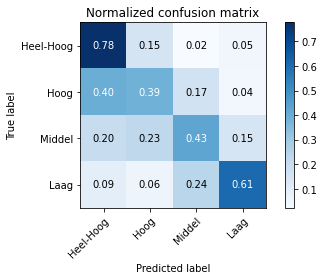

In [163]:
classes = ['Heel-Hoog','Hoog','Middel','Laag']
plot_confusion_matrix(y_test, y_pred, classes,
                          normalize=True,
                          title=None,
                          cmap=plt.cm.Blues)

In [166]:
# # Plot non-normalized confusion matrix
# class_names = y
# titles_options = [("Confusion matrix, without normalization", None),
#                   ("Normalized confusion matrix", 'true')]
# for title, normalize in titles_options:
#     disp = plot_confusion_matrix(clf, X_test, y_test,
#                                  cmap=plt.cm.Blues,
#                                  normalize=normalize)
#     disp.ax_.set_title(title)

#     print(title)
#     print(disp.confusion_matrix)


In [169]:
# from io import StringIO
# dot_data = StringIO()
# export_graphviz(clf, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True,class_names=['lage gemidelde woz','hoge gemmidelde woz'] ,feature_names = feature_cols)
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# graph.write_png('dtree.png')
# Image(graph.create_png())

In [173]:

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

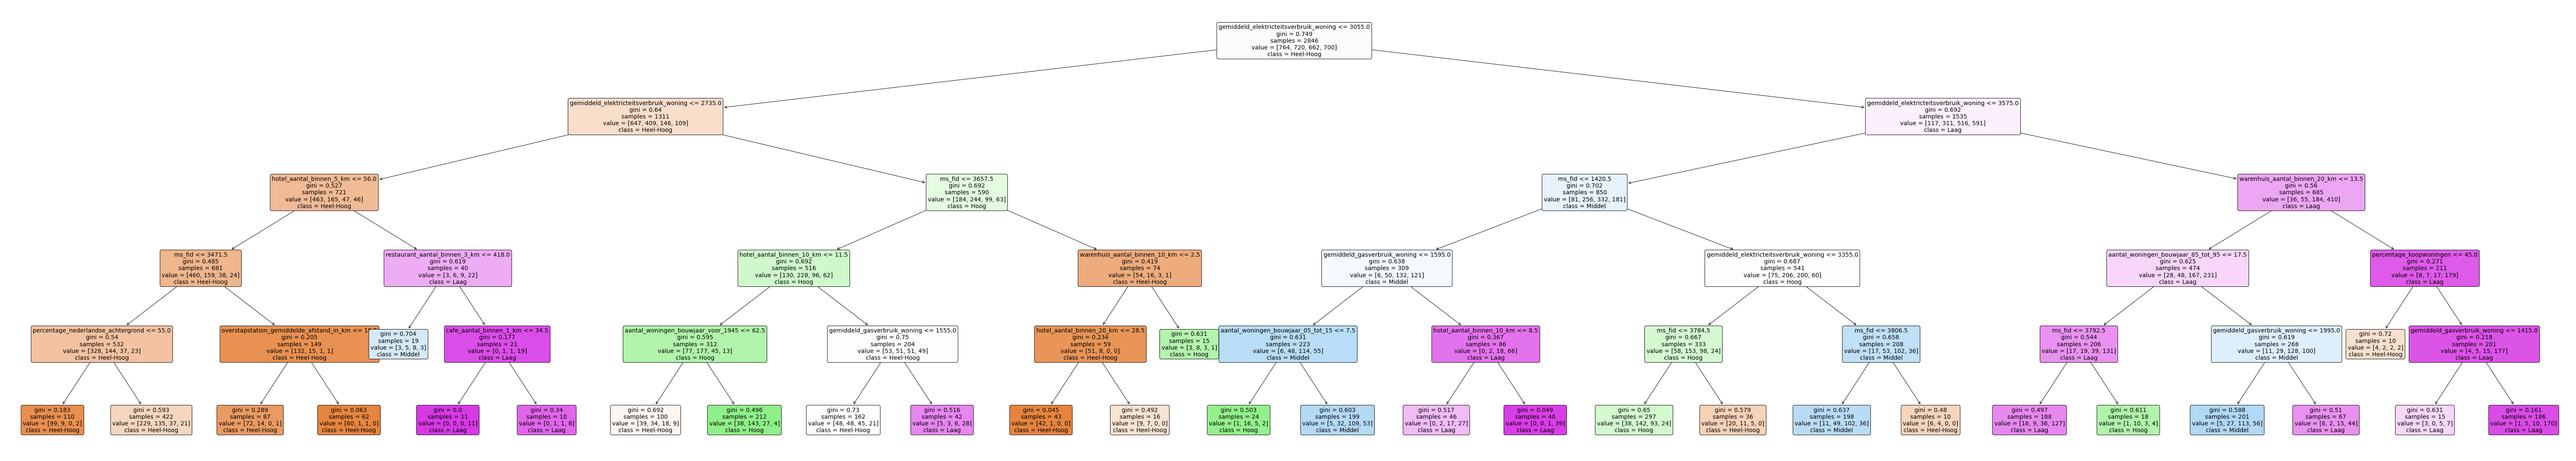

In [186]:
plt.figure(figsize=(110,20))
a = plot_tree(clf, 
              feature_names=feature_cols, 
              class_names=['Heel-Hoog','Hoog','Middel','Laag'], 
              filled=True, 
              rounded=True, 
              fontsize=14)
plt.savefig('foo.png')

<Figure size 432x288 with 0 Axes>